# Stanford CME 241 (Winter 2026) - Assignment 1

**Due: Friday, January 23 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):*

https://github.com/my-username/my-repo/assignment-file-name.ipynb

*Group members (replace below names with people in your group):*
- Evan Ellington
- Yuming Huang
- Yusuke Atsuta

## Imports

In [ ]:
from typing import Mapping, Dict
from dataclasses import dataclass
import matplotlib.pyplot as plt
from typing import Dict, Mapping

import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from typing import Mapping, Dict, Iterable
from rl.distribution import Categorical, FiniteDistribution, Constant
from rl.markov_process import FiniteMarkovProcess, NonTerminal

## Question 1: Snakes and Ladders (Led by Yusuke)

In the classic childhood game of Snakes and Ladders, all players start to the left of square 1 (call this position 0) and roll a 6-sided die to represent the number of squares they can move forward. The goal is to reach square 100 as quickly as possible. Landing on the bottom rung of a ladder allows for an automatic free-pass to climb, e.g. square 4 sends you directly to 14; whereas landing on a snake's head forces one to slide all the way to the tail, e.g. square 34 sends you to 6. Note, this game can be viewed as a Markov Process, where the outcome is only depedent on the current state and not the prior trajectory. In this question, we will ask you to both formally describe the Markov Process that describes this game, followed by coding up a version of the game to get familiar with the RL-book libraries.


### Problem Statement

How can we model this problem with a Markov Process?

---

### Subquestions

#### Part (A): MDP Modeling

Formalize the state space of the Snakes and Ladders game. Don't forget to specify the terminal state!

---

#### Part (B): Transition Probabilities

Write out the structure of the transition probabilities. Feel free to abbreviate all squares that do not have a snake or ladder.

---

#### Part (C): Modeling the Game

Code up a `transition_map: Transition[S]` data structure to represent the transition probabilities of the Snakes and Ladders Markov Process so you can model the game as an instance of `FiniteMarkovProcess`. Use the `traces` method to create sampling traces, and plot the graph of the distribution of time steps to finish the game. Use the image provided for the locations of the snakes and ladders.

https://drive.google.com/file/d/1yhP242sG092Ico_WOPKrUp8jVJHbuGHH/view?usp=sharing

---

### Part (A) Answer

**State space**
$$S = \{0,1,2,\dots,100\},$$
where:
- $0$ denotes the start position (before square 1),
- $s \in \{1,\dots,99\}$ denotes being on square $s$,
- $100$ denotes the goal square.

**Terminal state**
$$S_{\mathrm{terminal}} = \{100\}.$$

States represent the position after applying any snake or ladder effects. For example, if a player lands on the head of a snake or the base of a ladder, the resulting state is the corresponding end square.


### Part (B) Answer

Let $w:S \to S$ be the snake/ladder map, where each snake/ladder goes from square $i$ to square $w(i)$. Also, $w(i)=i$ if $i$ is not at the start of a snake/ladder.

For $s\in\{0,\dots,99\}$ and die roll $k\in\{1,\dots,6\}$, the transition probabilities are
$$\mathbb{P}\left(s' = w(\min(s+k,100)) \mid s\right) = \tfrac{1}{6}.$$

The terminal state is absorbing:
$$\mathbb{P}(100\mid100)=1.$$

### Part (C) Answer

Non-terminal states: 100
Transition Map:
From State 0:
  To State 38 with Probability 0.167
  To State 2 with Probability 0.167
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
From State 1:
  To State 2 with Probability 0.167
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
From State 2:
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
  To State 30 with Probability 0.167
From State 3:
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
  To State 30 with Probability 0.167
  To State 9 with Probability 0.167
From State 4:
  To State 5 with 

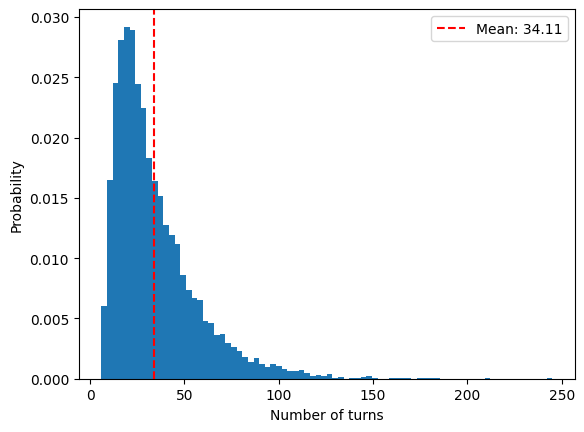

In [16]:
LADDERS = {
    1: 38, 4: 14, 8: 30, 21: 42, 
    28: 76, 50: 67, 71: 92, 80: 99
}

SNAKES = {
    36: 6, 32: 10, 48: 26, 62: 18, 
    88: 24, 95: 56, 97: 78
}

class SnakesAndLaddersMP(FiniteMarkovProcess[int]):
    
    def __init__(self, ladders: Dict[int, int], snakes: Dict[int, int]):
        self.ladders = ladders
        self.snakes = snakes
        self.target = 100
        super().__init__(self.get_transition_map())

    def get_transition_map(self) -> Mapping[int, FiniteDistribution[int]]:
        d: Dict[int, Categorical[int]] = {}
        
        for state in range(self.target):
            outcomes: Dict[int, float] = defaultdict(float)
            
            for roll in range(1, 7):
                next_pos = min(self.target, state + roll)
                if next_pos in self.ladders:
                    next_pos = self.ladders[next_pos]
                elif next_pos in self.snakes:
                    next_pos = self.snakes[next_pos]
                outcomes[next_pos] += 1.0 / 6.0

            d[state] = Categorical(outcomes)
            
        return d

if __name__ == '__main__':
    snl_process = SnakesAndLaddersMP(LADDERS, SNAKES)
    print(f"Non-terminal states: {len(snl_process.non_terminal_states)}")
    print("Transition Map:")
    print(snl_process)
    print()
    
    start_distribution = Constant(NonTerminal(0))
    simulation_traces = snl_process.traces(start_distribution)
    
    num_traces = 10000
    game_lengths = []
    
    for i, trace in enumerate(simulation_traces):
        if i >= num_traces:
            break
        game_lengths.append(len(list(trace)) - 1)

    avg_steps = np.mean(game_lengths)
    plt.hist(game_lengths, bins=80, density=True)
    plt.axvline(avg_steps, linestyle='--', color='red', label=f'Mean: {avg_steps:.2f}')
    plt.xlabel("Number of turns")
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

## Question 2: Markov Decision Processes (Led by Yusuke)

Consider an MDP with an infinite set of states ${S} = \{1,2,3,\ldots \}$. The start state is $s=1$. Each state $s$ allows a continuous set of actions $a \in [0,1]$. The transition probabilities are given by:
$$\mathbb{P}[s+1 \mid s, a] = a, \mathbb{P}[s \mid s, a] = 1 - a \text{ for all } s \in S \text{ for all } a \in [0,1]$$
For all states $s \in {S}$ and actions $a \in [0,1]$, transitioning from $s$ to $s+1$ results in a reward of $1-a$ and transitioning from $s$ to $s$ results in a reward of $1+a$. The discount factor $\gamma=0.5$.

### Problem Statement

How can we derive a mathematical formulation for the value function and the optimal policy? And how do those functions change when we modify the action space?

---

### Subquestions

#### Part (A): Optimal Value Function  

Using the MDP Bellman Optimality Equation, calculate the Optimal Value Function $V^*(s)$ for all $s \in {S}$. Given $V^*(s)$, what is the optimal action, $a^*$, that maximizes the optimal value function?

---

#### Part (B): Optimal Policy  

Calculate an Optimal Deterministic Policy $\pi^*(s)$ for all $s \in {S}$.

---

#### Part (C): Changing the Action Space  

Let's assume that we modify the action space such that instead of $a \in [0,1]$ for all states, we restrict the action space to $a \in \left[0,\frac{1}{s}\right]$ for state $s$. This means that higher states have more restricted action spaces. How does this constraint affect:

- The form of the Bellman optimality equation?
- The optimal value function, $V^*(s)$?
- The structure of the optimal policy, $\pi^*(s)$?

---

### Part (A) Answer

The Bellman Optimality Equation is:
$$
V^*(s)
= \max_{a\in[0,1]}
\Big\{
R(s,a)
+ \gamma \sum_{s'\in S} P(s,a,s')\,V^*(s')
\Big\}.
$$

In this MDP, from state $s$:
- $P(s+1\mid s,a)=a$ with reward $1-a$,
- $P(s\mid s,a)=1-a$ with reward $1+a$.

Hence the expected immediate reward is
$$
R(s,a)=a(1-a)+(1-a)(1+a).
$$

Substituting into the Bellman equation gives
$$
V^*(s)
= \max_{a\in[0,1]}
\Big\{
a(1-a)+(1-a)(1+a)
+ \gamma [aV^*(s+1)+(1-a)V^*(s)]
\Big\}.
$$

Because the MDP is translation-invariant in $s$, since we have same transitions/rewards for every $s$, the optimal value is the same for all states. We can thus write $V^*(s)=V^*(s+1)=V^*$. Therefore, the equation simplifies to
$$
V^* = \max_{a\in[0,1]} \big\{1+a-2a^2 + \gamma V^*\big\}
= \max_{a\in[0,1]} \{ 1+a-2a^2 \} + \gamma V^*.
$$

Solving with $\gamma = 0.5$, we get
$$
V^* =\tfrac{9}{4} \quad \text{for all } s\in S,
$$
and the optimal action is $a^*=\tfrac14$.


### Part (B) Answer

From Part (A), the optimal action $a^*=\tfrac14$ maximizes the Bellman Optimality Equation.
By definition, an optimal deterministic policy $\pi^*$ selects, in each state $s$, an action that attains this maximum. Since the MDP is translation-invariant and the same maximizer applies for every state, the optimal policy is constant across states:
$$
\pi^*(s)=a^*=\tfrac14 \quad \text{for all } s\in\mathcal{S}.
$$

### Part (C) Answer

#### Bellman Optimality Equation Change:
The Bellman optimality equation becomes
$$
V^*(s)
= \max_{a\in[0,1/s]}
\Big\{
a(1-a)+(1-a)(1+a)
+ \gamma [aV^*(s+1)+(1-a)V^*(s)]
\Big\}
$$

#### Optimal Value Function Change:
Translation-invariance no longer holds, so $V^*(s)$ is not constant in $s$.

For each $s$, define $a_s^*=\pi^*(s)$. Then from the equation above, we obtain that $V^*(s)$ satisfies the recursion
$$
V^*(s)
=
\frac{(1+a_s^*-2(a_s^*)^2)+\gamma a_s^*\,V^*(s+1)}{1-\gamma+\gamma a_s^*}.
$$
With $\gamma=0.5$, this is
$$
V^*(s)
=
\frac{1+a_s^*-2(a_s^*)^2+0.5\,a_s^*V^*(s+1)}{0.5(1+a_s^*)}
=
\frac{2+2 a_s^*-4(a_s^*)^2+a_s^*V^*(s+1)}{1+a_s^*}.
$$

#### Optimal Policy Change:

Define the value difference $\Delta_s := V^*(s+1) - V^*(s)$. Rearranging the equation above gives
$$
V^*(s)
= 1 + 0.5V^*(s)
+ \max_{a \in [0,\,1/s]}
\Big\{
a(1 + 0.5\Delta_s) - 2a^2
\Big\}.
$$

Thus the optimal action maximizes the concave quadratic. The unconstrained maximizer is
$$
a(s) = \frac{1 + 0.5\Delta_s}{4}.
$$

Imposing the constraint $ a \in [0,\,1/s] $ yields the optimal policy
$$
\pi^*(s) =
\min\!\left\{
\frac{1}{s},
\;
\max\!\left\{
0,
\;
\frac{1 + 0.5\big(V^*(s+1) - V^*(s)\big)}{4}
\right\}
\right\}.
$$

Unlike before, the optimal policy is state-dependent due to the shrinking action space.

## Question 3: Frog in a Pond (Led by Yuming)

Consider an array of $n+1$ lilypads on a pond, numbered $0$ to $n$. A frog sits on a lilypad other than the lilypads numbered $0$ or $n$. When on lilypad $i$ ($1 \leq i \leq n-1$), the frog can croak one of two sounds: **A** or **B**.

- If it croaks **A** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to lilypad $i-1$ with probability $\frac{i}{n}$.
  - It is thrown to lilypad $i+1$ with probability $\frac{n-i}{n}$.
  
- If it croaks **B** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to one of the lilypads $0, \ldots, i-1, i+1, \ldots, n$ with uniform probability $\frac{1}{n}$.

A snake, perched on lilypad $0$, will eat the frog if it lands on lilypad $0$. The frog can escape the pond (and hence, escape the snake!) if it lands on lilypad $n$.

### Problem Statement

What should the frog croak when on each of the lilypads $1, 2, \ldots, n-1$, in order to maximize the probability of escaping the pond (i.e., reaching lilypad $n$ before reaching lilypad $0$)?

Although there are multiple ways to solve this problem, we aim to solve it by modeling it as a **Markov Decision Process (MDP)** and identifying the **Optimal Policy**.

---

### Subquestions

#### Part (A): MDP Modeling

Express the frog-escape problem as an MDP using clear mathematical notation by defining the following components:

- **State Space**: Define the possible states of the MDP.
- **Action Space**: Specify the actions available to the frog at each state.
- **Transition Function**: Describe the probabilities of transitioning between states for each action.
- **Reward Function**: Specify the reward associated with the states and transitions.

---

#### Part (B): Python Implementation

There is starter code below to solve this problem programatically. Fill in each of the $6$ `TODO` areas in the code. As a reference for the transition probabilities and rewards, you can make use of the example in slide 16/31 from the following slide deck: https://github.com/coverdrive/technical-documents/blob/master/finance/cme241/Tour-MP.pdf.

Write Python code that:

- Models this MDP.
- Solves the **Optimal Value Function** and the **Optimal Policy**.

Feel free to use/adapt code from the textbook. Note, there are other libraries that are needed to actually run this code, so running it will not do anything. Just fill in the code so that it could run assuming that the other libraries are present.

---

#### Part (C): Visualization and Analysis

What patterns do you observe for the **Optimal Policy** as you vary $n$ from $3$ to $25$? When the frog is on lilypad $13$ (with $25$ total), what action should the frog take? Is this action different than the action the frog should take if it is on lilypad $1$?

---

### Part (A) Answer

#### State Space:  

The set of all lilypads, including the start (snake) and end (escape).
$$\mathcal{S} = \{0, 1, 2, \ldots, n\}$$
We define the set of non-terminal states where decisions are made as $\mathcal{N} = \{1, 2, \ldots, n-1\}$. States $0$ and $n$ are terminal. We can define them as $\mathcal{T} = \{0, n\}$

#### Action Space:  

For any non-terminal state $s \in \mathcal{N}$, the available actions are:
$$\mathcal{A}(s) = \{ \text{A}, \text{B} \}$$

#### Transition Function:  

Let $\mathcal{P}(s' \mid s, a)$ denote the probability of transitioning from state $s$ to $s'$ given action $a$.


* **For Action A:**
The frog jumps to $s-1$ or $s+1$ based on its current position $s$.
$$
\mathcal{P}(s' \mid s, \text{A}) =
\begin{cases}
\frac{s}{n} & \text{if } s' = s-1 \\
\frac{n-s}{n} & \text{if } s' = s+1 \\
0 & \text{otherwise}
\end{cases}
$$

* **For Action B:**
The frog jumps uniformly to any lilypad except the current one. The set of possible targets is $\mathcal{S} \setminus \{s\}$, which has size $n$.
$$
\mathcal{P}(s' \mid s, \text{B}) =
\begin{cases}
\frac{1}{n} & \text{if } s' \in \{0, \ldots, n\} \text{ and } s' \neq s \\
0 & \text{otherwise}
\end{cases}
$$

#### Reward Function:  

To maximize the probability of escaping, we define the reward to be $1$ only when the frog successfully reaches the escape pad ($n$). All other transitions yield $0$ reward.
$$
\mathcal{R}(s, a, s') =
\begin{cases}
1 & \text{if } s' = n \\
0 & \text{otherwise}
\end{cases}
$$
*(We set the discount factor $\gamma = 1$, so that the Value Function $V(s)$ will strictly represent the probability of reaching state $n$ from state $s$.)*

### Part (B) Answer

In [ ]:
class MDPRefined:
    def __init__(self, data: Dict, gamma: float):
        self.data = data
        self.gamma = gamma

#MDPRefined = dict
def get_lily_pads_mdp(n: int) -> MDPRefined:
    data = {
        i: {
            'A': {
                i - 1: i / n, # TODO: fill in with the correct transition probabilities
                i + 1: (n - i) / n, # TODO: fill in with the correct transition probabilities
            },
            'B': {
                j: 1/n for j in range(n+1) if j != i # TODO: fill in with the correct transition probabilities
            }
        } for i in range(1, n)
    }
    data[0] = {'A': {0: 1}, 'B': {0: 1}} # TODO: this is the initial state, so what would be the correct transition probabilities?
    data[n] = {'A': {n: 1}, 'B': {n: 1}} # TODO: similarly, this is the terminal state, so what would be the correct transition probabilities?

    gamma = 1.0
    return MDPRefined(data, gamma)

Mapping = dict
def direct_bellman(n: int) -> Mapping[int, float]:
    mdp = get_lily_pads_mdp(n)
    data = mdp.data
    vf = [0.5] * (n + 1)
    vf[0] = 0.
    vf[n] = 1.0
    tol = 1e-8
    epsilon = tol * 1e4
    while epsilon >= tol:
        old_vf = [v for v in vf]
        for i in range(1, n):
            val_A = sum(prob * old_vf[next_s] for next_s, prob in data[i]['A'].items())
            val_B = sum(prob * old_vf[next_s] for next_s, prob in data[i]['B'].items())
            vf[i] = max(val_A, val_B) # TODO: fill in with the Bellman update
        epsilon = max(abs(old_vf[i] - v) for i, v in enumerate(vf))
    return {v: f for v, f in enumerate(vf)}

### Part (C) Answer


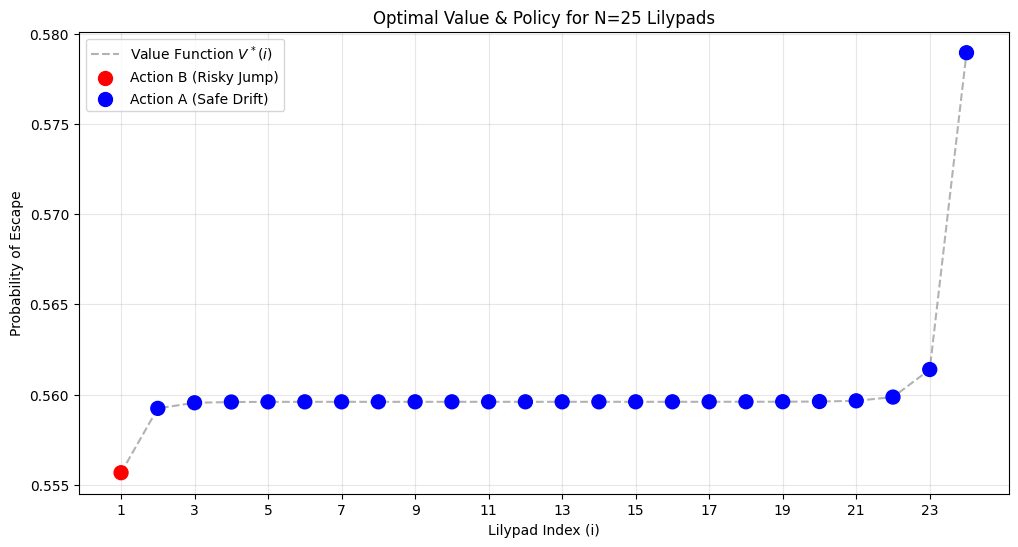

In [ ]:
n = 25
vf = direct_bellman(n)
policy = get_optimal_policy(n, vf)

states = list(range(1, n))  
values = [vf[i] for i in states]
actions = [policy[i] for i in states]

plt.figure(figsize=(12, 6))

plt.plot(states, values, color='gray', linestyle='--', alpha=0.6, label='Value Function $V^*(i)$')

colors = ['red' if policy[i] == 'B' else 'blue' for i in states]
plt.scatter(states, values, c=colors, s=100, zorder=5)

plt.scatter([], [], c='red', s=100, label='Action B')
plt.scatter([], [], c='blue', s=100, label='Action A')

plt.title(f'Optimal Value & Policy for N={n} Lilypads')
plt.xlabel('Lilypad Index (i)')
plt.ylabel('Probability of Escape')
plt.xticks(range(1, n, 2)) 
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

What patterns do you observe for the Optimal Policy as you vary n from 3 to 25?

The optimal policy follows a strict pattern for all n≥3. The frog should always take Action B when on Lilypad 1, and Action A for all other lilypads (2,…,n−1).

When the frog is on lilypad 13 (with 25 total), what action should the frog take?

The frog should take Action A.

Is this action different than the action the frog should take if it is on lilypad 1?

Yes. At Lilypad 1, the optimal action is B.

Reasoning:

At Lilypad 1: Both Action A and Action B carry the exact same risk of immediate death (1/n). However, Action A only allows the frog to reach Lilypad 2, while Action B offers a uniform probability of landing anywhere in the pond (including escaping immediately). Because the potential reward of Action B is higher for the same level of risk, Action B is optimal.

At Lilypad 13: The frog is safe from immediate death if it chooses Action A (it moves to 12 or 14). Action B, however, always carries a 1/n risk of jumping back to 0 (death). Since the frog is already deep in the pond, the "shortcut" offered by B is not worth the risk of dying. Therefore, Action A is optimal.

## Question 4: Manual Value Iteration (Led by Evan)

Consider a simple MDP with ${S} = \{s_1, s_2, s_3\}, {T} = \{s_3\}, {A} = \{a_1, a_2\}$. The State Transition Probability function  
$${P}: {N} \times {A} \times {S} \rightarrow [0, 1]$$  
is defined as:  
$${P}(s_1, a_1, s_1) = 0.25, {P}(s_1, a_1, s_2) = 0.65, {P}(s_1, a_1, s_3) = 0.1$$  
$${P}(s_1, a_2, s_1) = 0.1, {P}(s_1, a_2, s_2) = 0.4, {P}(s_1, a_2, s_3) = 0.5$$  
$${P}(s_2, a_1, s_1) = 0.3, {P}(s_2, a_1, s_2) = 0.15, {P}(s_2, a_1, s_3) = 0.55$$  
$${P}(s_2, a_2, s_1) = 0.25, {P}(s_2, a_2, s_2) = 0.55, {P}(s_2, a_2, s_3) = 0.2$$  

The Reward Function  
$${R}: {N} \times {A} \rightarrow \mathbb{R}$$  
is defined as:  
$${R}(s_1, a_1) = 8.0, {R}(s_1, a_2) = 10.0$$  
$${R}(s_2, a_1) = 1.0, {R}(s_2, a_2) = -1.0$$  

Assume a discount factor of $\gamma = 1$.

### Problem Statement

Your task is to determine an Optimal Deterministic Policy **by manually working out** (not with code) the first two iterations of the Value Iteration algorithm.

---

### Subquestions

#### Part (A): 2 Iterations

1. Initialize the Value Function for each state to be its $\max$ (over actions) reward, i.e., we initialize the Value Function to be $v_0(s_1) = 10.0, v_0(s_2) = 1.0, v_0(s_3) = 0.0$. Then manually calculate $q_k(\cdot, \cdot)$ and $v_k(\cdot)$ from $v_{k - 1}(\cdot)$ using the Value Iteration update, and then calculate the greedy policy $\pi_k(\cdot)$ from $q_k(\cdot, \cdot)$ for $k = 1$ and $k = 2$ (hence, 2 iterations).

---

#### Part (B): Argument

1. Now argue that $\pi_k(\cdot)$ for $k > 2$ will be the same as $\pi_2(\cdot)$. *Hint*: You can make the argument by examining the structure of how you get $q_k(\cdot, \cdot)$ from $v_{k-1}(\cdot)$. With this argument, there is no need to go beyond the two iterations you performed above, and so you can establish $\pi_2(\cdot)$ as an Optimal Deterministic Policy for this MDP.

---

#### Part (C): Policy Evaluation

1. Using the policy $\pi_2(\cdot)$, compute the exact value function $V^{\pi_2}(s)$ for all $s\in S$.

---

#### Part (D): Sensitivity Analysis

Assume the reward for $R(s_1, a_2)$ is modified to $11.0$ instead of $10.0$.

1. Perform one iteration of Value Iteration starting from the initialized value function $v_0(s)$, where $v_0(s)$ remains the same as in the original problem.
2. Determine whether this change impacts the Optimal Deterministic Policy $\pi(\cdot)$. If it does, explain why.

---

### Part (A) Answer

$$Q_k(s,a) = R(s,a) + \gamma \sum _{s'} P(s,a,s')V_{k-1}(s')$$
#### First Iteration (k=1):
**state 1 -> action 1** 
$$
\begin{aligned}
Q_1(s_1,a_1)
&= R(s_1,a_1) + \sum_{s'} P(s_1,a_1,s') V_0(s') \\
&= 8.0 + 0.25(10) + 0.65(1) + 0.1(0) \\
&= 8.0 + 2.5 + 0.65 + 0 \\
&= 11.15
\end{aligned}
$$
**state 1 -> action 2** 
$$
\begin{aligned}
Q_1(s_1,a_2)
&= R(s_1,a_2) + \sum_{s'} P(s_1,a_2,s') V_0(s') \\
&= 10.0 + 0.1(10) + 0.4(1) + 0.5(0) \\
&= 10.0 + 1.0 + 0.4 + 0 \\
&= 11.4
\end{aligned}
$$

**state 2 -> action 1** 
$$
\begin{aligned}
Q_1(s_2,a_1)
&= R(s_2,a_1) + \sum_{s'} P(s_2,a_1,s') V_0(s') \\
&= 1.0 + 0.3(10) + 0.15(1) + 0.55(0) \\
&= 1.0 + 3 + 0.15 + 0 \\
&= 4.15
\end{aligned}
$$
**state 2 -> action 2** 
$$
\begin{aligned}
Q_1(s_2,a_2)
&= R(s_2,a_2) + \sum_{s'} P(s_2,a_2,s') V_0(s') \\
&= -1.0 + 0.25(10) + 0.55(1) + 0.2(0) \\
&= -1.0 + 2.5 + 0.55 + 0 \\
&= 2.05
\end{aligned}
$$

$$
\begin{aligned}
&V_1(s_1) = max\{11.15, 11.4\} = 11.4, \pi _1(s_1) = a_2\\
&V_1(s_2) = max\{4.15, 2.05\} = 4.15, \pi _1(s_2) = a_1\\
&V_1(s_3) = 0, \pi _1(s_3)\ is\ arbitrary\\
\end{aligned}
$$

#### First Iteration (k=2):
**state 1 -> action 1** 
$$
\begin{aligned}
Q_2(s_1,a_1)
&= R(s_1,a_1) + \sum_{s'} P(s_1,a_1,s') V_1(s') \\
&= 8.0 + 0.25(11.4) + 0.65(4.15) + 0.1(0) \\
&= 8.0 + 2.85 + 2.697 + 0 \\
&= 13.55
\end{aligned}
$$
**state 1 -> action 2** 
$$
\begin{aligned}
Q_2(s_1,a_2)
&= R(s_1,a_2) + \sum_{s'} P(s_1,a_2,s') V_1(s') \\
&= 10.0 + 0.1(11.4) + 0.4(4.15) + 0.5(0) \\
&= 10.0 + 1.14 + 1.66 + 0 \\
&= 12.8
\end{aligned}
$$

**state 2 -> action 1** 
$$
\begin{aligned}
Q_2(s_2,a_1)
&= R(s_2,a_1) + \sum_{s'} P(s_2,a_1,s') V_1(s') \\
&= 1.0 + 0.3(11.4) + 0.15(4.15) + 0.55(0) \\
&= 1.0 + 3.42 + 0.6225 + 0 \\
&= 5.0425
\end{aligned}
$$
**state 2 -> action 2** 
$$
\begin{aligned}
Q_2(s_2,a_2)
&= R(s_2,a_2) + \sum_{s'} P(s_2,a_2,s') V_1(s') \\
&= -1.0 + 0.25(11.4) + 0.55(4.15) + 0.2(0) \\
&= -1.0 + 2.85 + 2.2825 + 0 \\
&= 4.1325
\end{aligned}
$$

$$
\begin{aligned}
&V_2(s_1) = max\{13.55, 12.8\} = 13.55, \pi _2(s_1) = a_1\\
&V_2(s_2) = max\{5.04, 4.13\} = 4.1325, \pi _2(s_2) = a_1\\
&V_2(s_3) = 0, \pi _2(s_3)\ is\ arbitrary\\
\end{aligned}
$$

### Part (B) Answer:  

$$
Q_k(s,a) = R(s,a) + \gamma \sum _{s'} P(s,a,s') * V_{k-1}(s')
$$
The policy will only change if the ordering of $Q_k(s_1,a_1)$ and $Q_k(s_1,a_2)$ changes for a state 1. Looking at state 1 at iteration $k=2$:\
*state 1:* $Q_2(s_1,a_1) > Q_2(s_1,a_2)$\
so $V_2(s_1) = 13.55$\
and $ \pi _2(s_1) = a_1$

$Q_k$ is linear in $V_{k-1}$, and value iteration is monotone increasing ($V_k \geq V_{k-1}$). So once one action is better than another, the subsequent $V_{k-1}$ (i.e. $V_k$) will preserve that ordering, therefore the best action to take will not change after $k=2$ for all $k>2$. So $\pi _k (s_1)= \pi _2 (s_1)$ for all $k>2$.

### Part (C) Answer:  

**state 1:**
$$
\begin{aligned}
V^{\pi _2}(s_1) &= R(s_1,a_1) + \sum _{s'} P(s_1, a_1, s')*V^{\pi _2}(s')\\
&= 8.0 + (0.25*V^{\pi _2}(s_1) + 0.65*V^{\pi _2}(s_2) + 0.1*V^{\pi _2}(s_3))\\
&= 8.0 + 0.25V^{\pi _2}(s_1) + 0.65V^{\pi _2}(s_2) +0\\
\end{aligned}
$$

**state 2:**
$$
\begin{aligned}
V^{\pi _2}(s_2) &= R(s_2,a_1) + \sum _{s'} P(s_2, a_1, s')*V^{\pi _2}(s')\\
&= 1.0 + (0.3*V^{\pi _2}(s_1) + 0.15*V^{\pi _2}(s_2) + 0.55*V^{\pi _2}(s_3))\\
&= 1.0 + 0.3V^{\pi _2}(s_1) + 0.15V^{\pi _2}(s_2) +0\\
\end{aligned}
$$

**combining to solve linear systems of equations:**\
multiplying $V^{\pi _2}(s_1)$ by $0.85$ and $V^{\pi _2}(s_2)$ by $0.65$: 

$$
\begin{aligned}
&(8.0 = 0.75V^{\pi _2}(s_1) - 0.65V^{\pi _2}(s_2))*0.85\\
+&\\
&(1.0 = -0.3V^{\pi _2}(s_1) + 0.85V^{\pi _2}(s_2))*0.65\\
\end{aligned}
$$

this becomes:
$$
\begin{aligned}
& 6.8= 0.6375V^{\pi _2}(s_1) - 0.5525V^{\pi _2}(s_2)\\
+&\\
& 0.65 = -0.195V^{\pi _2}(s_1) + 0.5525V^{\pi _2}(s_2)\\
\hline
& 7.45 = 0.4425V^{\pi _2}(s_1) \\
&\rightarrow V^{\pi _2}(s_1) = 16.742\\
\end{aligned}
$$
Plugging in the value for $V^{\pi _2}(s_1)$ into the second equation from state 2, give us $V^{\pi _2}(s_2) = 7.086$

### Part (D) Answer

#### Value Iteration:  

##### Part 1 
**for state 1:**\
$\rightarrow a_1$ same as before
$$Q_1(s_1,a_1) = 11.4$$
$\rightarrow a_2$ 
$$
\begin{aligned}
Q_1(s_1,a_2) &= R(s_1,a_2) + \gamma \sum _{s'} P(s_1, a_2, s')V_0(s')\\
&= 11 + (0.1(10) + 0.4(1) + 0.5(0))\\
&= 11 + 1 + 0.4\\
&= 12.4\\
\end{aligned}
$$
**for state 2:**\
$\rightarrow a_1$ same as before
$$Q_1(s_2,a_1) = 4.15$$
$\rightarrow a_2$ same as before
$$Q_1(s_2,a_2) = 2.05$$

$$
\begin{aligned}
&V_1(s_1) = max\{11.15, 12.4\} = 12.4, \pi _1(s_1) = a_2\\
&V_1(s_2) = max\{4.15, 2.05\} = 4.15, \pi _1(s_2) = a_1\\
&V_1(s_3) = 0, \pi _1(s_3)\ is\ arbitrary \\
\end{aligned}
$$

##### Part 2
ignoring as mentioned in ed post: https://edstem.org/us/courses/90295/discussion/7544563


#### Optimal Deterministic Policy:  

$\pi ^{*} = a_1$

## Question 5: Fixed-Point and Policy Evaluation True/False Questions (Led by Yuming and Evan)

### Recall Section: Key Formulas and Definitions

#### Bellman Optimality Equation
The Bellman Optimality Equation for state-value functions is:
$$
V^*(s) = \max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^*(s') \right].
$$
For action-value functions:
$$
Q^*(s, a) = R(s, a) + \gamma \sum_{s'} P(s, a, s') \max_{a'} Q^*(s', a').
$$

#### Contraction Property
The Bellman Policy Operator $B^\pi$ is a contraction under the $L^\infty$-norm:
$$
\|B^\pi(X) - B^\pi(Y)\|_\infty \leq \gamma \|X - Y\|_\infty.
$$
This guarantees convergence to a unique fixed point.

#### Policy Iteration
Policy Iteration alternates between:
1. **Policy Evaluation**: Compute $V^\pi$ for the current policy $\pi$.
2. **Policy Improvement**: Generate a new policy $\pi'$ by setting:
   $$
   \pi'(s) = \arg\max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^\pi(s') \right].
   $$

#### Discounted Return
The discounted return from time step $t$ is:
$$
G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i,
$$
where $\gamma \in [0, 1)$ is the discount factor.

### True/False Questions (Provide Justification)

1. **True/False**: If $Q^\pi(s, a) = 5$, $P(s, a, s') = 0.5$ for $s' \in \{s_1, s_2\}$, and the immediate reward $R(s, a)$ increases by $2$, the updated action-value function $Q^\pi(s, a)$ also increases by $2$.


---

2. **True/False**: For a discount factor $\gamma = 0.9$, the discounted return for rewards $R_1 = 5, R_2 = 3, R_3 = 1$ is greater than $6$.

---

3. **True/False**: The Bellman Policy Operator $B^\pi(V) = R^\pi + \gamma P^\pi \cdot V$ satisfies the contraction property for all $\gamma \in [0, 1)$, ensuring a unique fixed point.

---

4. **True/False**: In Policy Iteration, the Policy Improvement step guarantees that the updated policy $\pi'$ will always perform strictly better than the previous policy $\pi$.

---

5. **True/False**: If $Q^\pi(s, a) = 10$ for all actions $a$ in a state $s$, then the corresponding state-value function $V^\pi(s) = 10$, regardless of the policy $\pi$.

---

6. **True/False**: The discounted return $G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i$ converges to a finite value for any sequence of bounded rewards if $\gamma < 1$.

---

### Answers (Provide justification, brief explanations are fine)

#### Question 1:  

* **Answer: True**
* **Justification:** Let the original immediate reward be $R$. The definition of the Q-value is:
$$Q^\pi(s, a) = R + \gamma \left[ 0.5 V^\pi(s_1) + 0.5 V^\pi(s_2) \right] = 5$$
If the immediate reward increases by 2, the new reward is $R' = R + 2$. The new Q-value becomes:
$$Q'_{new} = (R + 2) + \gamma \left[ 0.5 V^\pi(s_1) + 0.5 V^\pi(s_2) \right]$$
Rearranging the terms to group the original equation:
$$Q'_{new} = \underbrace{\left( R + \gamma [0.5 V^\pi(s_1) + 0.5 V^\pi(s_2)] \right)}_{Q^\pi(s, a) = 5} + 2$$
$$Q'_{new} = 5 + 2 = 7$$
Thus, the updated action-value function increases exactly by 2.

#### Question 2:  

* **Answer: True**
* **Justification:** The discounted return $G_t$ is calculated as:
$$G = \gamma^0 R_1 + \gamma^1 R_2 + \gamma^2 R_3 = (1 \cdot 5) + (0.9 \cdot 3) + (0.9^2 \cdot 1)$$
$$G = 5 + 2.7 + 0.81 = 8.51$$
$8.51 > 6$ so it is true.

#### Question 3:  

* **Answer: True**
* **Justification:** The Bellman operator $B^\pi$ is a $\gamma$-contraction mapping with respect to the $L_\infty$-norm (max-norm). By the **Banach Fixed-Point Theorem**, any contraction mapping on a complete metric space guarantees the existence of a unique fixed point. That unique fixed point is the true value function $V^\pi$.

#### Question 4:  

* **Answer: False**
* **Justification:** The Policy Improvement Theorem only guarantees $V^{\pi'}(s) \geq V^\pi(s)$. It does not guarantee *strict* improvement ($>$).
    * **Counterexample:**
        Consider a state $s$ with two actions, $a_1$ and $a_2$.
        * Action $a_1$ yields a value of 5 ($Q^\pi(s, a_1) = 5$).
        * Action $a_2$ also yields a value of 5 ($Q^\pi(s, a_2) = 5$).
        * The current policy $\pi$ chooses $a_1$, so $V^\pi(s) = 5$.
    * **The Update Step:**
        The new policy $\pi'(s)$ is chosen by $\arg\max_a Q^\pi(s, a)$.
        $$\pi'(s) = \arg\max(5, 5)$$
        Whether the new policy picks $a_1$ or switches to $a_2$, the value of the new policy remains 5.
        $$V^{\pi'}(s) = 5$$
    * **Conclusion:** Since $V^{\pi'}(s) = V^\pi(s) = 5$, the policy did not strictly improve; it stayed the same (converged).

#### Question 5:  

* **Answer: True**
* **Justification:** The state-value function $V^\pi(s)$ is the expectation of the Q-values over the policy's action distribution:
$$V^\pi(s) = \sum_{a} \pi(a|s) Q^\pi(s, a)$$
If $Q^\pi(s, a) = 10$ for all $a$, we can factor out the constant:
$$V^\pi(s) = 10 \cdot \sum_{a} \pi(a|s)$$
Since probabilities sum to 1 ($\sum \pi(a|s) = 1$), it follows that $V^\pi(s) = 10 \cdot 1 = 10$. This holds for any stochastic or deterministic policy.

#### Question 6:  

* **Answer: True**
* **Justification:** Assume the rewards are bounded by a constant $R_{\max}$ (i.e., $|R_i| \leq R_{\max}$). The absolute value of the return is bounded by the sum of absolute rewards:
$$|G_t| \leq \sum_{k=0}^\infty \gamma^k |R_{t+k+1}| \leq R_{\max} \sum_{k=0}^\infty \gamma^k$$
For $\gamma < 1$, the geometric series $\sum_{k=0}^\infty \gamma^k$ converges to $\frac{1}{1-\gamma}$. Thus, $|G_t| \leq \frac{R_{\max}}{1-\gamma}$, which is a finite value.